In [1]:
%%bash
jupyter labextension list

JupyterLab v3.2.9


In [2]:
from plotly.offline import init_notebook_mode, iplot
import pandas as pd

import string, os, random
from textblob import TextBlob 
import plotly.graph_objs as go

import plotly.express as px

init_notebook_mode(connected=True)

In [3]:
punc = string.punctuation

In [4]:
south = pd.read_excel('../data/Tweets_etiqueta.xlsx', sheet_name='SouthwestAir')
south['airline'] = 'SouthwestAir'
south.head()

,Responsable,Texto,Sentimiento,airline
0,V,@SouthwestAir What about bike fees,0.0,SouthwestAir
1,V,@SouthwestAir I ❤️ SWA,1.0,SouthwestAir
2,V,@SouthwestAir Mask mandate tho,0.0,SouthwestAir
3,V,@SouthwestAir has ripped me off by delaying my...,-1.0,SouthwestAir
4,V,@SouthwestAir I’ll take my chances with @Delta...,0.0,SouthwestAir


In [5]:
jetblue = pd.read_excel('../data/Tweets_etiqueta.xlsx', sheet_name='JetBlue')
jetblue['airline'] = 'JetBlue'
jetblue.head()

,Responsable,Texto,Sentimiento,airline
0,V,@JustinMeyerKC @JetBlue @KCIAirport Cheers fro...,0.0,JetBlue
1,V,@caseycgolden @SpiritAirlines @JetBlue That so...,-1.0,JetBlue
2,V,"Hey @JetBlue, it’s been four days since you lo...",-1.0,JetBlue
3,V,@JustinMeyerKC @JetBlue Wil they be releasing ...,0.0,JetBlue
4,V,You can have your cake and eat it too when you...,0.0,JetBlue


In [6]:
df = pd.concat(
    [
        south,
        jetblue
    ]
)

df = df.loc[df.Sentimiento.isin([1,-1]), ['Texto', 'Sentimiento','airline']]
df.columns = [x.lower() for x in df.columns]

df.head()

,texto,sentimiento,airline
1,@SouthwestAir I ❤️ SWA,1.0,SouthwestAir
3,@SouthwestAir has ripped me off by delaying my...,-1.0,SouthwestAir
5,@SouthwestAir I checked two bags and still had...,1.0,SouthwestAir
8,@SouthwestAir Just looked at flights to Seattl...,1.0,SouthwestAir
9,@Mike__Green @SouthwestAir And any last shred ...,-1.0,SouthwestAir


In [7]:
df.groupby('airline').sentimiento.value_counts()

airline       sentimiento
JetBlue       -1.0           1091
               1.0            262
SouthwestAir  -1.0            918
               1.0            441
Name: sentimiento, dtype: int64

In [8]:
df['word_count'] = df['texto'].apply(lambda x : len(x.split()))
df['char_count'] = df['texto'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['punc_count'] = df['texto'].apply(lambda x : len([a for a in x if a in punc]))

df[['word_count', 'char_count', 'word_density', 'punc_count']].head()

,word_count,char_count,word_density,punc_count
1,4,19,0.200000,1
3,26,116,0.222222,4
5,18,93,0.191489,10
8,33,160,0.204969,7
9,8,49,0.160000,4


In [9]:
# function to obtain the sentiment of the headline using textblob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

In [10]:
df['polarity'] = df['texto'].apply(get_polarity)

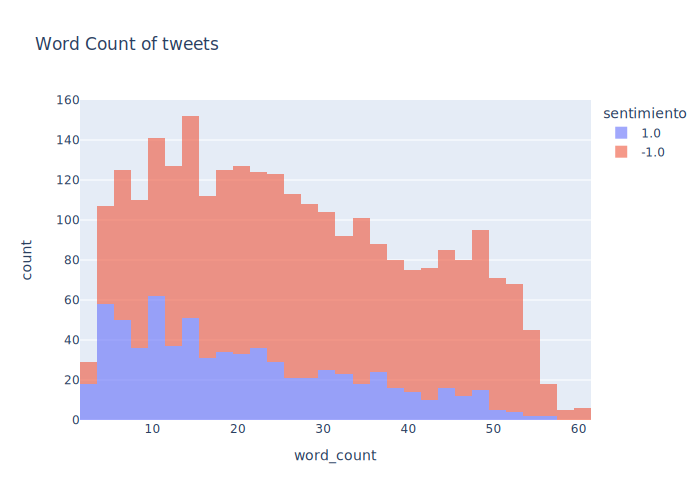

In [11]:
fig = px.histogram(
    df, 
    x="word_count", 
    color="sentimiento",
    title='Word Count of tweets'
    
)
fig.update_traces(opacity=0.6)
fig.show(renderer="svg")

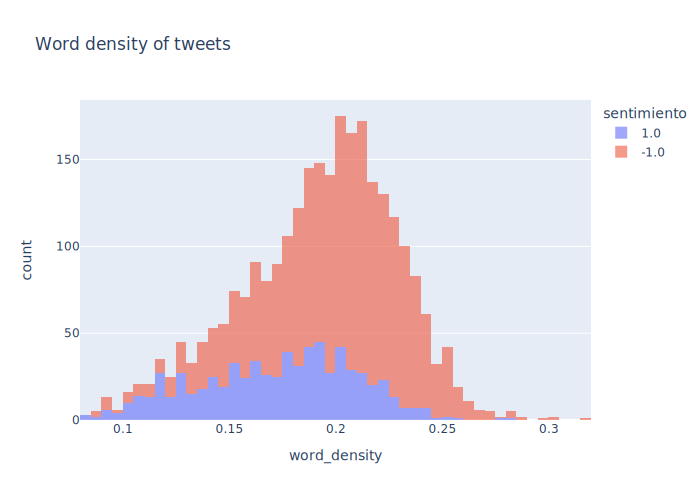

In [12]:
fig = px.histogram(
    df, 
    x="word_density", 
    color="sentimiento",
    title='Word density of tweets'
    
)
fig.update_traces(opacity=0.6)
fig.show(renderer="svg")

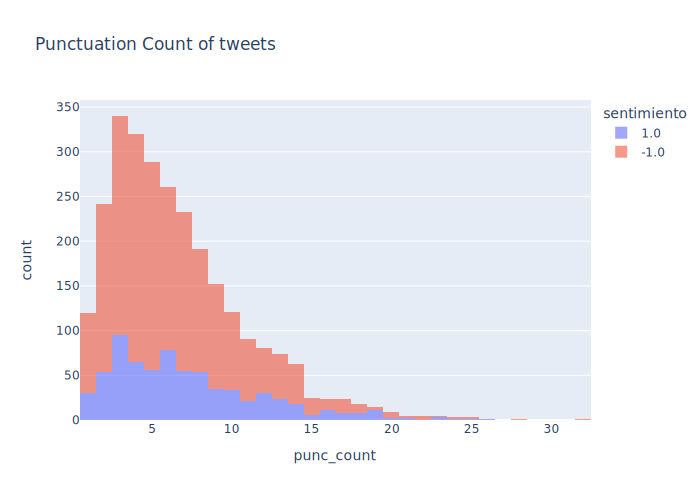

In [13]:
fig = px.histogram(
    df, 
    x="punc_count", 
    color="sentimiento",
    title='Punctuation Count of tweets'
    
)
fig.update_traces(opacity=0.6)
fig.show(renderer="svg")

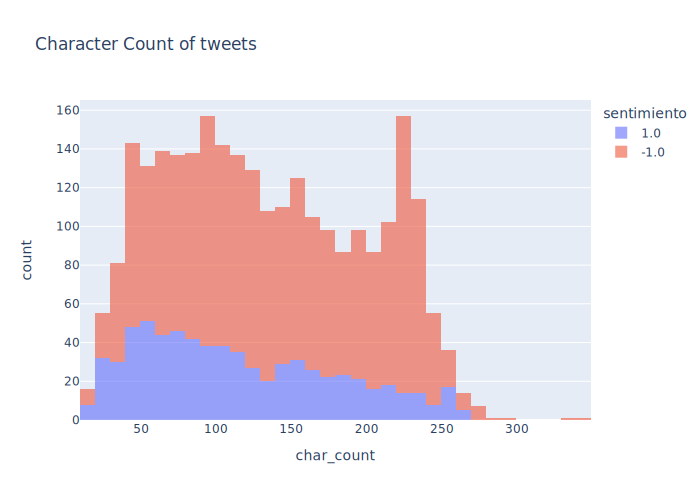

In [14]:
fig = px.histogram(
    df, 
    x="char_count", 
    color="sentimiento",
    title='Character Count of tweets'
    
)
fig.update_traces(opacity=0.6)
fig.show(renderer="svg")

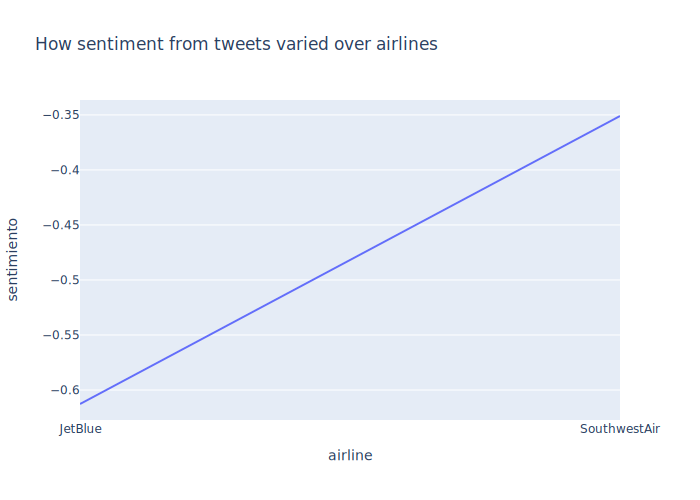

In [15]:
aggdf = df.reset_index().groupby(by=['airline']).agg({'sentimiento':'mean'}).reset_index()

fig = px.line(
    aggdf,
    x='airline', 
    y='sentimiento',
    title='How sentiment from tweets varied over airlines'
)
fig.show(renderer="svg")